# Data Preparation

In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')

In [3]:
# ARIMA models

belgium_data = pd.read_csv("univariate_df_Belgium.csv")
chile_data = pd.read_csv("univariate_df_Chile.csv")
czechia_data = pd.read_csv("univariate_df_Czechia.csv")
estonia_data = pd.read_csv("univariate_df_Estonia.csv")
france_data = pd.read_csv("univariate_df_France.csv")
ireland_data = pd.read_csv("univariate_df_Ireland.csv")
israel_data = pd.read_csv("univariate_df_Israel.csv")
italy_data = pd.read_csv("univariate_df_Italy.csv")
malaysia_data = pd.read_csv("univariate_df_Malaysia.csv")
usa_data = pd.read_csv("univariate_df_United_States.csv")

In [4]:
#set index to datetime
belgium_data['date'] = pd.to_datetime(belgium_data['date'])
belgium_data.set_index('date', inplace=True)

chile_data['date'] = pd.to_datetime(chile_data['date'])
chile_data.set_index('date', inplace=True)

czechia_data['date'] = pd.to_datetime(czechia_data['date'])
czechia_data.set_index('date', inplace=True)

estonia_data['date'] = pd.to_datetime(estonia_data['date'])
estonia_data.set_index('date', inplace=True)

france_data['date'] = pd.to_datetime(france_data['date'])
france_data.set_index('date', inplace=True)

ireland_data['date'] = pd.to_datetime(ireland_data['date'])
ireland_data.set_index('date', inplace=True)

israel_data['date'] = pd.to_datetime(israel_data['date'])
israel_data.set_index('date', inplace=True)

italy_data['date'] = pd.to_datetime(italy_data['date'])
italy_data.set_index('date', inplace=True)

malaysia_data['date'] = pd.to_datetime(malaysia_data['date'])
malaysia_data.set_index('date', inplace=True)

usa_data['date'] = pd.to_datetime(usa_data['date'])
usa_data.set_index('date', inplace=True)



In [5]:
! pip install pmdarima

# Models

## ARIMA

### Belgium ARIMA

In [6]:
##arima belgium
train_size = int(len(belgium_data) * 0.8)
belgium_train, belgium_test = belgium_data[0:train_size], belgium_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(belgium_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
3,1,4,2238.200299
7,2,4,2239.495220
11,3,4,2240.750981
15,4,4,2242.754329
13,4,2,2248.292003
10,3,3,2248.806847
6,2,3,2250.391333
14,4,3,2252.902045
8,3,1,2256.385498
4,2,1,2257.609463


In [7]:
model=ARIMA(belgium_train['new_deaths'],order=(1,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -903.745
Date:                Wed, 28 Feb 2024   AIC                           1819.491
Time:                        20:42:19   BIC                           1837.942
Sample:                    03-01-2020   HQIC                          1826.983
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7094      0.043     16.685      0.000       0.626       0.793
ma.L1          0.4066      1.814      0.224      0.823      -3.148       3.961
ma.L2         -0.2815      2.542     -0.111      0.912      -5.263       4.700
ma.L3         -0.6186      2.033     -0.304      0.761      -4.602       3.365
ma.L4         -0.5056      0.915     -0.553      0.581      -2.299       1.288
sigma2      4574.9571   8254.392      0.554      0.579   -1.16e+04    2.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              2330.29
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             2.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

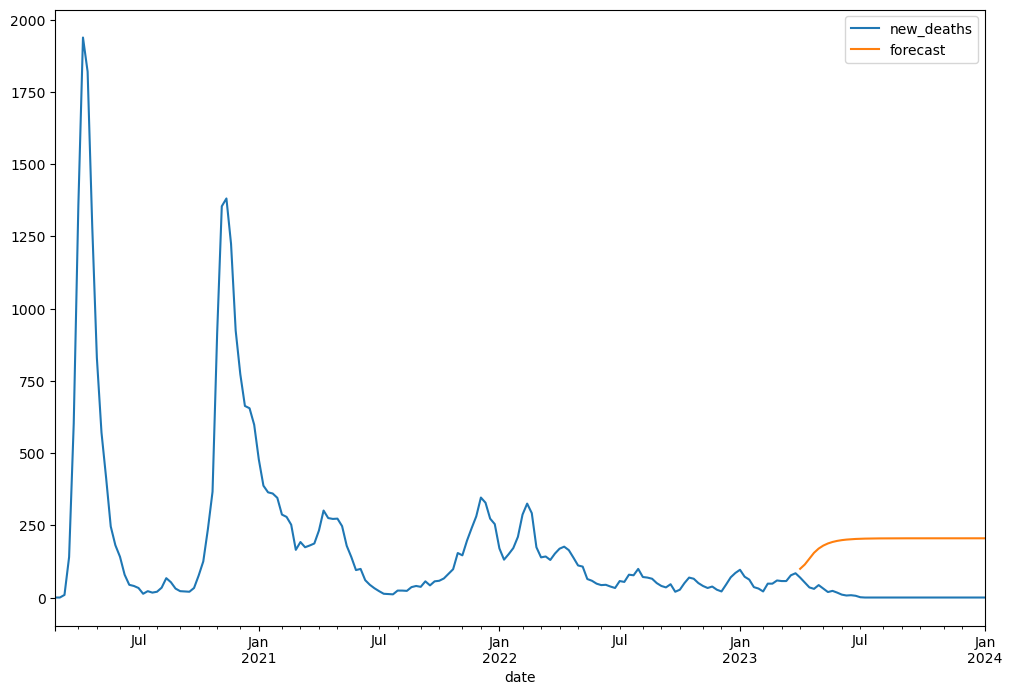

In [8]:
belgium_data['forecast']=model_fit.predict(start = len(belgium_train), end=len(belgium_train)+len(belgium_test)-1, dynamic=True)
belgium_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [9]:
small_constant = 1
actuals = belgium_test['new_deaths'] + small_constant
predictions = belgium_data.loc[belgium_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100

metrics_df = pd.DataFrame(columns=['Model', 'MAPE'])
metrics_df = metrics_df.append({'Model': 'ARIMA Belgium', 'MAPE': mape}, ignore_index=True)


### Chile ARIMA

In [10]:
##arima chile
train_size = int(len(chile_data) * 0.8)
chile_train, chile_test = chile_data[0:train_size], chile_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(chile_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
1,1,2,3291.576764
0,1,1,3292.814050
4,2,1,3293.148674
2,1,3,3293.241853
5,2,2,3293.511085
8,3,1,3293.917585
3,1,4,3295.026748
12,4,1,3295.228459
9,3,2,3295.428063
7,2,4,3297.222102


In [11]:
model=ARIMA(chile_train['new_deaths'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1324.605
Date:                Wed, 28 Feb 2024   AIC                           2657.211
Time:                        20:42:24   BIC                           2669.512
Sample:                    03-01-2020   HQIC                          2662.206
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7743      0.345      2.246      0.025       0.099       1.450
ma.L1         -1.6626      0.363     -4.574      0.000      -2.375      -0.950
ma.L2          0.6628      0.365      1.816      0.069      -0.053       1.378
sigma2      8.869e+05   7.94e-07   1.12e+12      0.000    8.87e+05    8.87e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):            109339.15
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              30.46   Skew:                            10.76
Prob(H) (two-sided):                  0.00   Kurtosis:                       129.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.48e+27. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

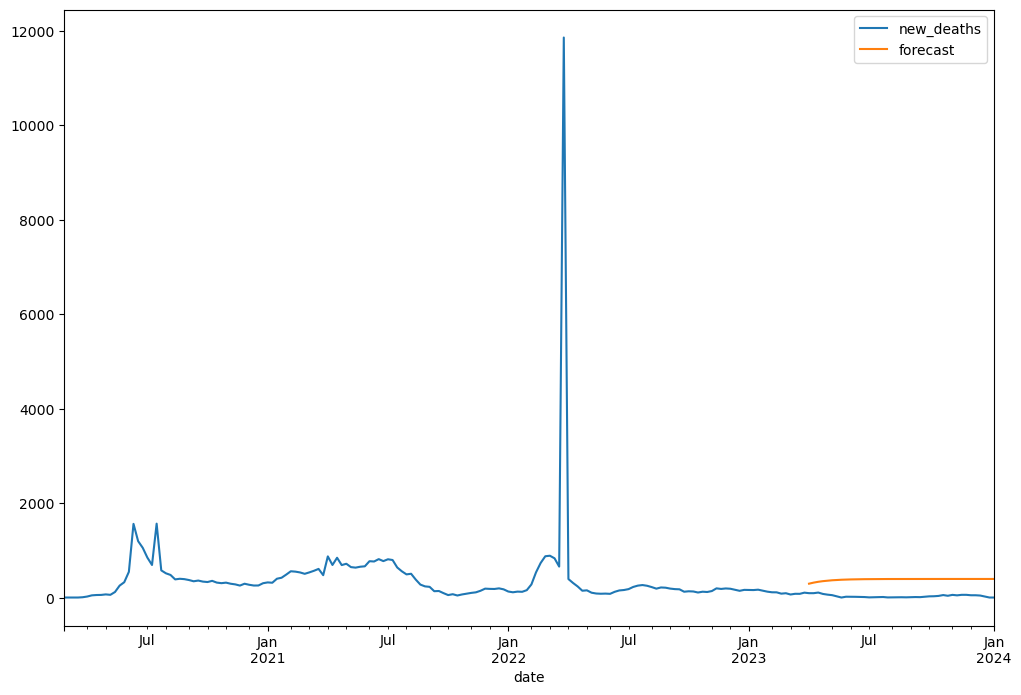

In [12]:
chile_data['forecast']=model_fit.predict(start = len(chile_train), end=len(chile_train)+len(chile_test)-1, dynamic=True)
chile_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [13]:
small_constant = 1
actuals = chile_test['new_deaths'] + small_constant
predictions = chile_data.loc[chile_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA Chile', 'MAPE': mape}, ignore_index=True)

### Czechia ARIMA

In [14]:
##arima czech
train_size = int(len(czechia_data) * 0.8)
czechia_train, czechia_test = czechia_data[0:train_size], czechia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(czechia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
10,3,3,2222.349188
7,2,4,2222.596764
6,2,3,2222.854063
11,3,4,2224.030918
4,2,1,2225.865841
14,4,3,2225.920398
15,4,4,2226.172664
12,4,1,2226.477838
5,2,2,2227.505405
8,3,1,2227.677579


In [15]:
model=ARIMA(chile_train['new_deaths'],order=(3,1,3))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1326.767
Date:                Wed, 28 Feb 2024   AIC                           2667.535
Time:                        20:42:28   BIC                           2689.061
Sample:                    03-01-2020   HQIC                          2676.276
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1913      4.997      0.038      0.969      -9.603       9.985
ar.L2         -1.0057      0.576     -1.747      0.081      -2.134       0.123
ar.L3          0.1047      0.158      0.660      0.509      -0.206       0.415
ma.L1         -1.0777      5.036     -0.214      0.831     -10.947       8.792
ma.L2          1.0851      5.007      0.217      0.828      -8.728      10.898
ma.L3         -0.9909      0.104     -9.496      0.000      -1.195      -0.786
sigma2      1.044e+06   7.42e-06   1.41e+11      0.000    1.04e+06    1.04e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            108399.45
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              25.82   Skew:                            10.75
Prob(H) (two-sided):                  0.00   Kurtosis:                       128.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+28. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

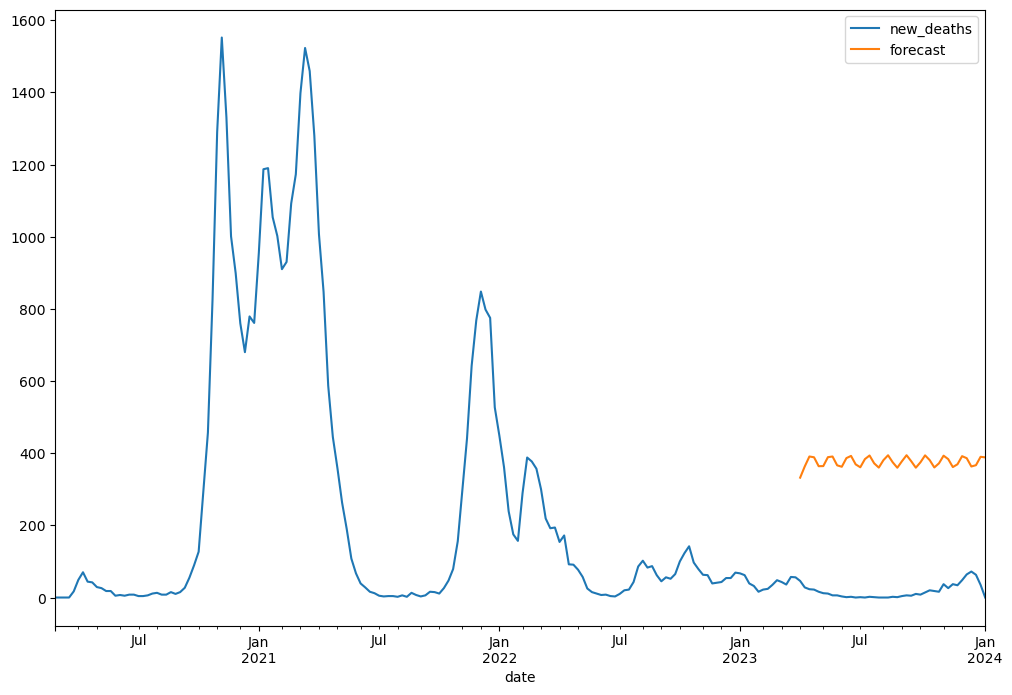

In [16]:
czechia_data['forecast']=model_fit.predict(start = len(czechia_train), end=len(czechia_train)+len(czechia_test)-1, dynamic=True)
czechia_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [17]:
small_constant = 1
actuals = czechia_test['new_deaths'] + small_constant
predictions = czechia_data.loc[czechia_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA Czechia', 'MAPE': mape}, ignore_index=True)

### Estonia ARIMA

In [18]:
##arima estonia
train_size = int(len(estonia_data) * 0.8)
estonia_train, estonia_test = estonia_data[0:train_size], estonia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(estonia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,4,1566.802471
1,1,2,1566.866848
0,1,1,1567.447200
11,3,4,1568.705628
5,2,2,1568.817953
4,2,1,1568.912023
2,1,3,1569.108787
8,3,1,1569.201931
12,4,1,1569.333626
3,1,4,1569.553578


In [19]:
model=ARIMA(estonia_train['new_deaths'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -634.156
Date:                Wed, 28 Feb 2024   AIC                           1282.313
Time:                        20:42:31   BIC                           1303.839
Sample:                    03-01-2020   HQIC                          1291.054
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5068      0.091    -16.515      0.000      -1.686      -1.328
ar.L2         -0.9080      0.079    -11.554      0.000      -1.062      -0.754
ma.L1          0.8551      0.202      4.229      0.000       0.459       1.251
ma.L2          0.1555      0.124      1.250      0.211      -0.088       0.399
ma.L3         -0.2415      0.140     -1.727      0.084      -0.516       0.033
ma.L4          0.2999      0.084      3.570      0.000       0.135       0.465
sigma2       160.7475     28.682      5.605      0.000     104.532     216.963
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               887.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

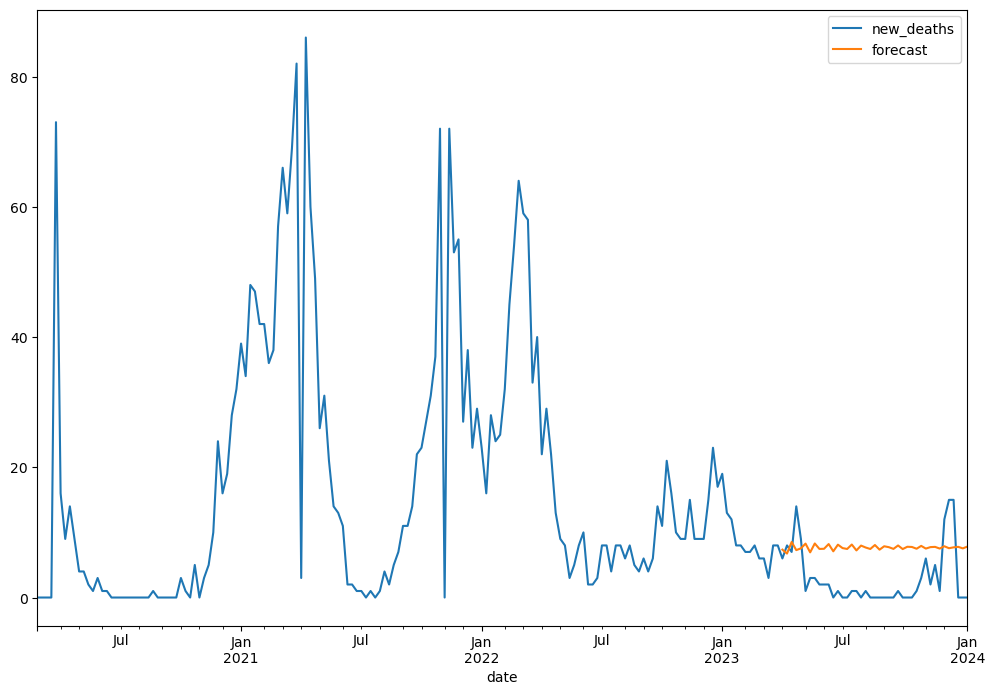

In [20]:
estonia_data['forecast']=model_fit.predict(start = len(estonia_train), end=len(estonia_train)+len(estonia_test)-1, dynamic=True)
estonia_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [21]:
small_constant = 1
actuals = estonia_test['new_deaths'] + small_constant
predictions = estonia_data.loc[estonia_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA Estonia', 'MAPE': mape}, ignore_index=True)

### France ARIMA

In [22]:
##arima france
train_size = int(len(france_data) * 0.8)
france_train, france_test = france_data[0:train_size], france_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(france_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
3,1,4,2662.682447
6,2,3,2663.098499
11,3,4,2663.890489
7,2,4,2664.412819
10,3,3,2664.451603
15,4,4,2665.882423
13,4,2,2666.216507
4,2,1,2666.261996
8,3,1,2666.350545
5,2,2,2667.377973


In [23]:
model=ARIMA(france_train['new_deaths'],order=(1,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -1072.290
Date:                Wed, 28 Feb 2024   AIC                           2156.581
Time:                        20:42:35   BIC                           2175.032
Sample:                    03-01-2020   HQIC                          2164.073
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8912      0.032     27.624      0.000       0.828       0.954
ma.L1         -0.0080      0.126     -0.063      0.950      -0.255       0.240
ma.L2         -0.2413      0.095     -2.553      0.011      -0.427      -0.056
ma.L3         -0.4883      0.062     -7.889      0.000      -0.610      -0.367
ma.L4         -0.2624      0.060     -4.386      0.000      -0.380      -0.145
sigma2      3.801e+04   5.77e-06   6.59e+09      0.000     3.8e+04     3.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               140.47
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.9e+26. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

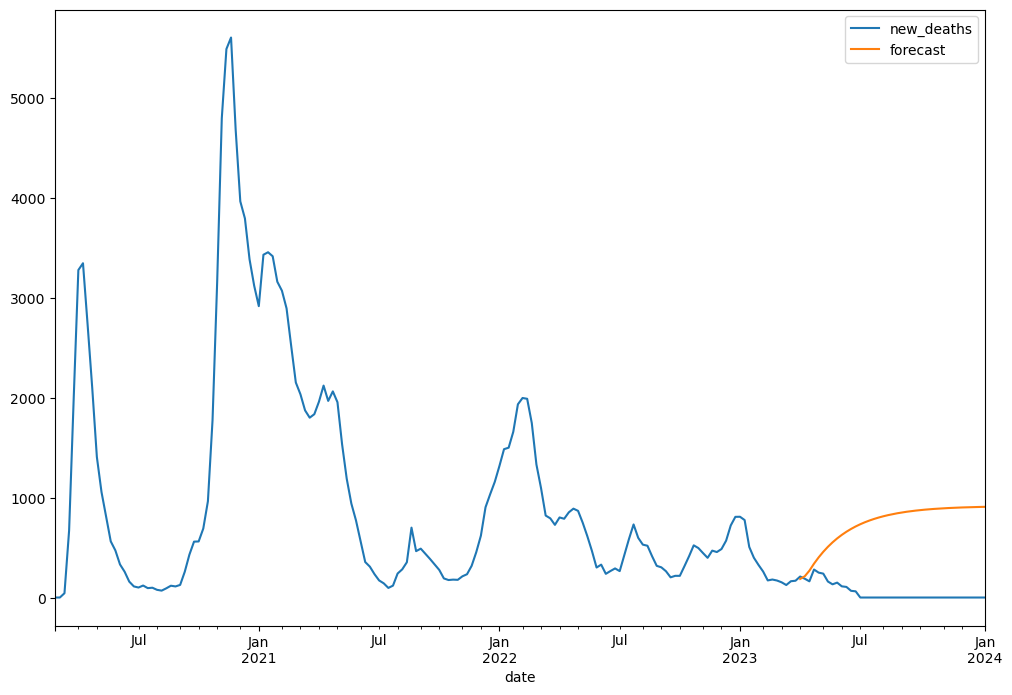

In [24]:
france_data['forecast']=model_fit.predict(start = len(france_train), end=len(france_train)+len(france_test)-1, dynamic=True)
france_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [25]:
small_constant = 1
actuals = france_test['new_deaths'] + small_constant
predictions = france_data.loc[france_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA France', 'MAPE': mape}, ignore_index=True)

### Ireland ARIMA

In [26]:
##arima ireland
train_size = int(len(ireland_data) * 0.8)
ireland_train, ireland_test = ireland_data[0:train_size], ireland_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(ireland_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
4,2,1,1804.382133
10,3,3,1805.239002
13,4,2,1805.593407
8,3,1,1805.982273
5,2,2,1806.045870
12,4,1,1807.212943
11,3,4,1807.229193
9,3,2,1807.352124
14,4,3,1807.374752
6,2,3,1807.485978


In [27]:
model=ARIMA(ireland_train['new_deaths'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -730.389
Date:                Wed, 28 Feb 2024   AIC                           1468.778
Time:                        20:42:39   BIC                           1481.078
Sample:                    03-01-2020   HQIC                          1473.773
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5117      0.041     36.900      0.000       1.431       1.592
ar.L2         -0.6500      0.045    -14.504      0.000      -0.738      -0.562
ma.L1         -0.9998      3.603     -0.277      0.781      -8.062       6.062
sigma2       526.7563   1889.580      0.279      0.780   -3176.752    4230.265
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              2509.59
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             2.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

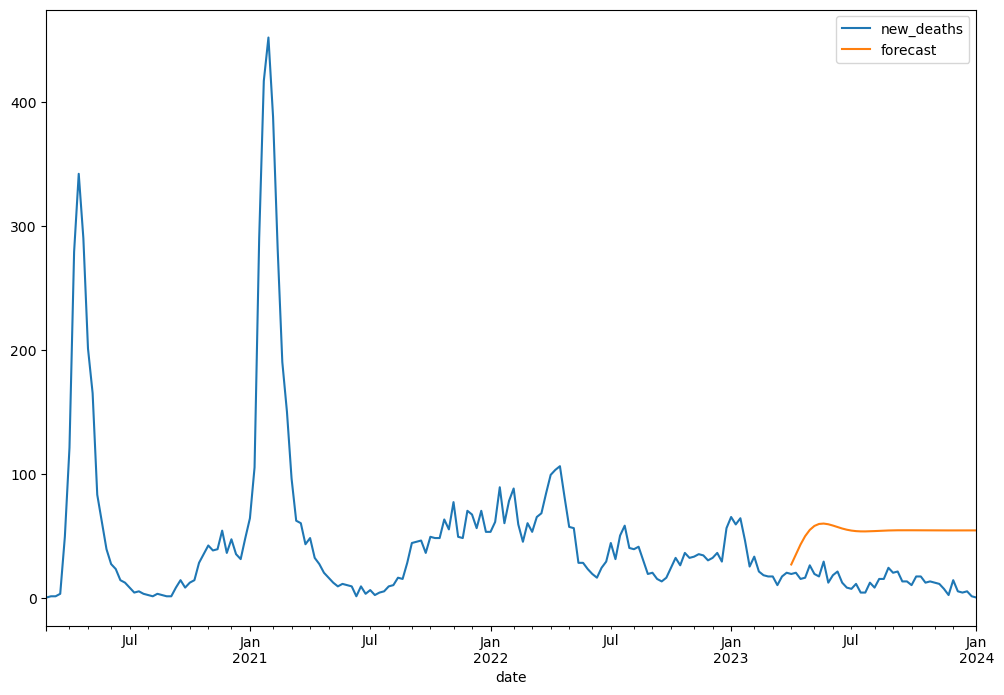

In [28]:
ireland_data['forecast']=model_fit.predict(start = len(ireland_train), end=len(ireland_train)+len(ireland_test)-1, dynamic=True)
ireland_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [29]:
small_constant = 1
actuals = ireland_test['new_deaths'] + small_constant
predictions = ireland_data.loc[ireland_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA Ireland', 'MAPE': mape}, ignore_index=True)

### Italy ARIMA

In [30]:
##arima italy
train_size = int(len(italy_data) * 0.8)
italy_train, italy_test = italy_data[0:train_size], italy_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(italy_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
4,2,1,2789.606572
12,4,1,2790.044468
8,3,1,2790.789203
9,3,2,2791.937487
13,4,2,2792.485134
11,3,4,2793.278883
6,2,3,2793.435895
10,3,3,2796.022607
14,4,3,2796.347027
1,1,2,2798.088099


In [31]:
model=ARIMA(italy_train['new_deaths'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1124.739
Date:                Wed, 28 Feb 2024   AIC                           2257.478
Time:                        20:42:44   BIC                           2269.778
Sample:                    03-01-2020   HQIC                          2262.473
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6152      0.027     60.253      0.000       1.563       1.668
ar.L2         -0.6860      0.022    -31.874      0.000      -0.728      -0.644
ma.L1         -0.9998      2.338     -0.428      0.669      -5.582       3.582
sigma2      7.311e+04    1.7e+05      0.430      0.667    -2.6e+05    4.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               553.13
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

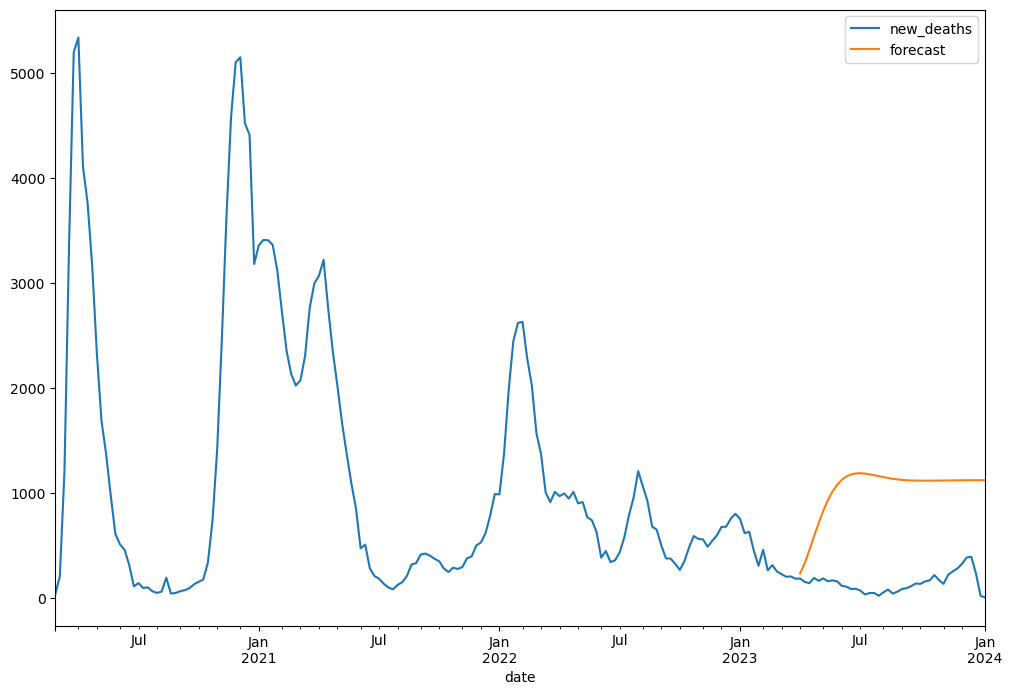

In [32]:
italy_data['forecast']=model_fit.predict(start = len(italy_train), end=len(italy_train)+len(italy_test)-1, dynamic=True)
italy_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [33]:
small_constant = 1
actuals = italy_test['new_deaths'] + small_constant
predictions = italy_data.loc[italy_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA Italy', 'MAPE': mape}, ignore_index=True)

### Israel ARIMA

In [34]:
##arima israel
train_size = int(len(israel_data) * 0.8)
israel_train, israel_test = israel_data[0:train_size], israel_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(israel_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,4,1795.079455
3,1,4,1796.312625
4,2,1,1796.317371
14,4,3,1796.401340
11,3,4,1796.490658
15,4,4,1797.410405
6,2,3,1797.650310
10,3,3,1797.796405
8,3,1,1798.284487
5,2,2,1798.292273


In [35]:
model=ARIMA(israel_train['new_deaths'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -725.362
Date:                Wed, 28 Feb 2024   AIC                           1464.724
Time:                        20:42:47   BIC                           1486.250
Sample:                    03-01-2020   HQIC                          1473.465
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2066      0.241      5.008      0.000       0.734       1.679
ar.L2         -0.3767      0.242     -1.554      0.120      -0.852       0.098
ma.L1         -0.6018      4.997     -0.120      0.904     -10.395       9.191
ma.L2         -0.0316      2.088     -0.015      0.988      -4.124       4.060
ma.L3         -0.1074      1.903     -0.056      0.955      -3.836       3.621
ma.L4         -0.2588      1.359     -0.190      0.849      -2.923       2.406
sigma2       495.3986   2508.821      0.197      0.843   -4421.801    5412.598
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               637.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

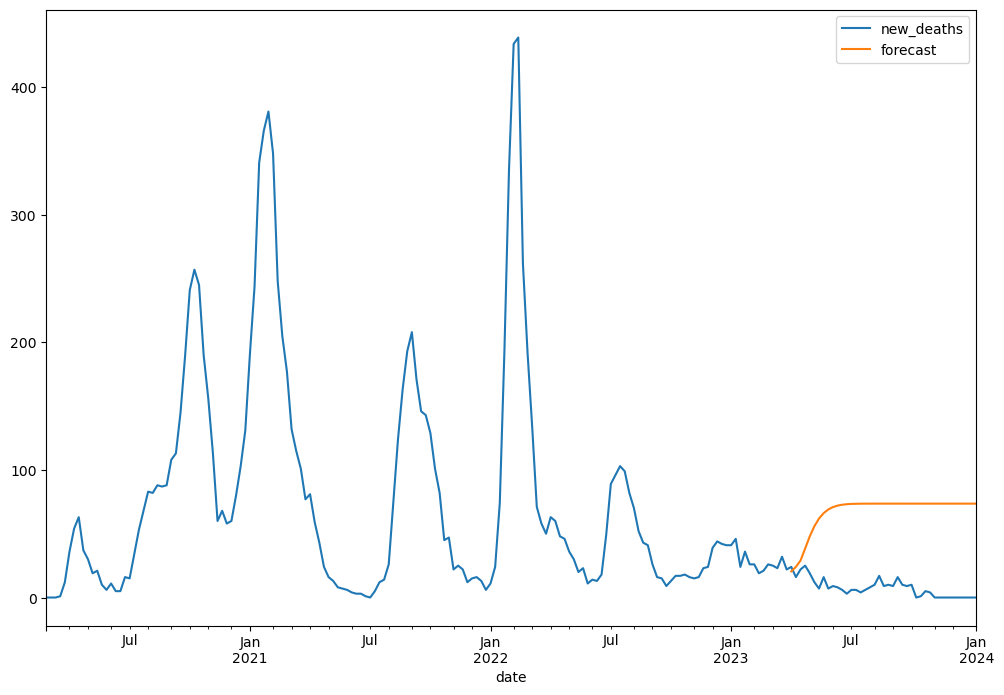

In [36]:
israel_data['forecast']=model_fit.predict(start = len(israel_train), end=len(israel_train)+len(israel_test)-1, dynamic=True)
israel_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [37]:
small_constant = 1
actuals = israel_test['new_deaths'] + small_constant
predictions = israel_data.loc[israel_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA Israel', 'MAPE': mape}, ignore_index=True)

### Malaysia ARIMA

In [38]:
##arima malaysia
train_size = int(len(malaysia_data) * 0.8)
malaysia_train, malaysia_test = malaysia_data[0:train_size], malaysia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(malaysia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
11,3,4,2358.308353
9,3,2,2358.636026
15,4,4,2358.680575
6,2,3,2359.117394
13,4,2,2360.592947
10,3,3,2360.599094
7,2,4,2360.682427
5,2,2,2360.819541
14,4,3,2362.067572
3,1,4,2364.182719


In [39]:
model=ARIMA(israel_train['new_deaths'],order=(3,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -725.163
Date:                Wed, 28 Feb 2024   AIC                           1466.325
Time:                        20:42:51   BIC                           1490.926
Sample:                    03-01-2020   HQIC                          1476.315
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9871      0.566      1.744      0.081      -0.122       2.097
ar.L2         -0.0197      0.906     -0.022      0.983      -1.795       1.755
ar.L3         -0.1639      0.437     -0.375      0.708      -1.020       0.692
ma.L1         -0.3858      1.690     -0.228      0.819      -3.698       2.926
ma.L2         -0.2461      1.087     -0.226      0.821      -2.376       1.884
ma.L3         -0.0943      0.634     -0.149      0.882      -1.338       1.149
ma.L4         -0.2727      0.485     -0.562      0.574      -1.224       0.679
sigma2       494.1933    772.971      0.639      0.523   -1020.802    2009.188
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               646.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

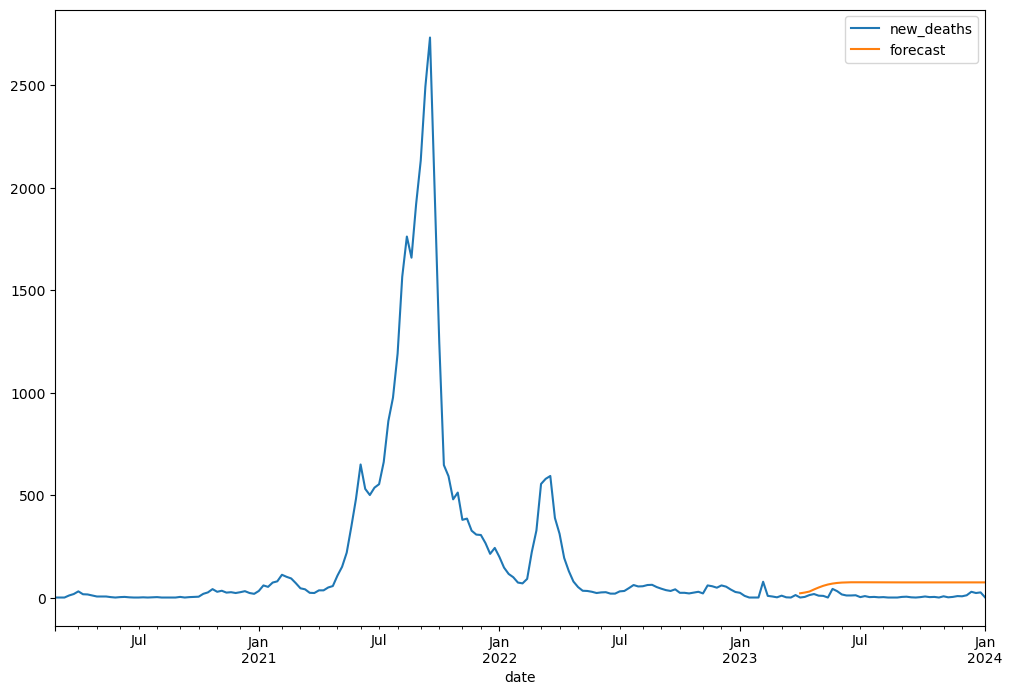

In [40]:
malaysia_data['forecast']=model_fit.predict(start = len(malaysia_train), end=len(malaysia_train)+len(malaysia_test)-1, dynamic=True)
malaysia_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [41]:
small_constant = 1
actuals = malaysia_test['new_deaths'] + small_constant
predictions = malaysia_data.loc[malaysia_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA Malaysia', 'MAPE': mape}, ignore_index=True)

### USA ARIMA

In [42]:
##arima us
train_size = int(len(usa_data) * 0.8)
usa_train, usa_test = usa_data[0:train_size], usa_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(usa_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
8,3,1,3423.116149
6,2,3,3423.487158
12,4,1,3423.662124
7,2,4,3425.559635
9,3,2,3427.055647
11,3,4,3427.853197
10,3,3,3429.672760
5,2,2,3430.174429
13,4,2,3431.366169
1,1,2,3431.486887


In [43]:
model=ARIMA(israel_train['new_deaths'],order=(3,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -728.609
Date:                Wed, 28 Feb 2024   AIC                           1467.219
Time:                        20:42:56   BIC                           1482.594
Sample:                    03-01-2020   HQIC                          1473.462
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5884      0.089     17.761      0.000       1.413       1.764
ar.L2         -0.7062      0.160     -4.409      0.000      -1.020      -0.392
ar.L3          0.0094      0.116      0.081      0.936      -0.217       0.236
ma.L1         -0.9807      0.057    -17.131      0.000      -1.093      -0.869
sigma2       520.7843     30.837     16.888      0.000     460.345     581.224
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               801.44
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

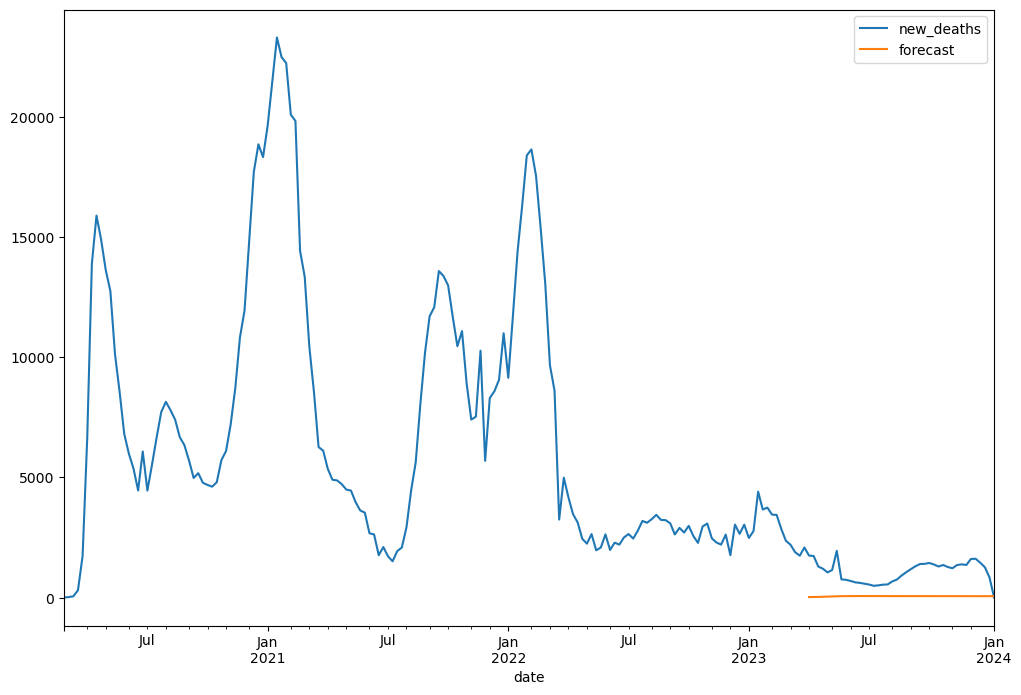

In [44]:
usa_data['forecast']=model_fit.predict(start = len(usa_train), end=len(usa_train)+len(usa_test)-1, dynamic=True)
usa_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [45]:
small_constant = 1
actuals = usa_test['new_deaths'] + small_constant
predictions = usa_data.loc[usa_test.index, 'forecast'] + small_constant
mape = mean_absolute_percentage_error(actuals, predictions) * 100
metrics_df = metrics_df.append({'Model': 'ARIMA USA', 'MAPE': mape}, ignore_index=True)

## Auto ARIMA

### Belgium AutoARIMA

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  161
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 4)   Log Likelihood                -903.252
Date:                             Wed, 28 Feb 2024   AIC                           1822.504
Time:                                     20:43:12   BIC                           1847.106
Sample:                                 03-01-2020   HQIC                          1832.494
                                      - 03-26-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4489      0.115      3.893      0.000       0.223       0.675
ar.L2         -0.7049      

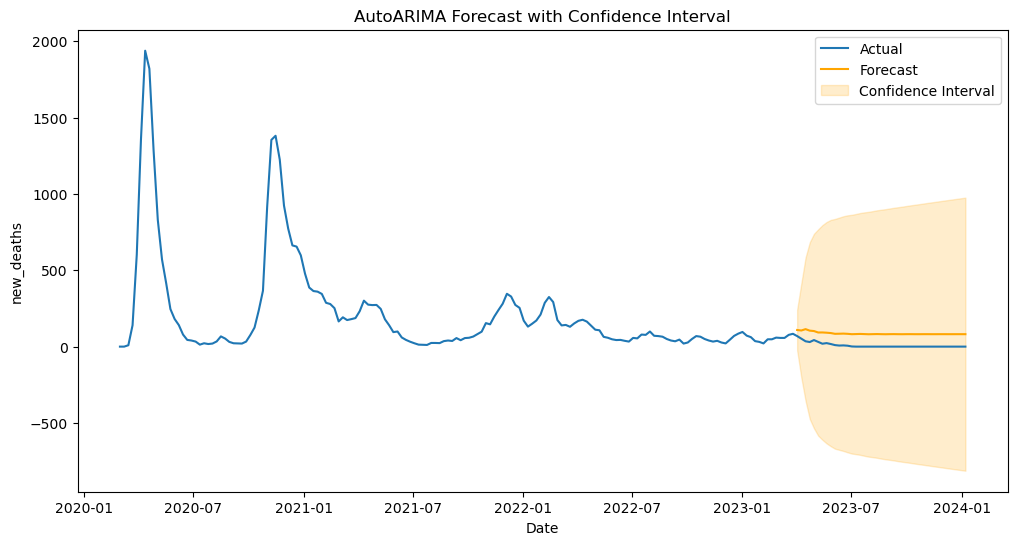

In [46]:
from pmdarima import auto_arima

auto_belgium = auto_arima(belgium_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_belgium.summary())

n_periods = len(belgium_test)
forecast, conf_int = auto_belgium.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = belgium_test.index

plt.figure(figsize=(12, 6))
plt.plot(belgium_data.index, belgium_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()


In [47]:
small_constant = 1
mape = np.mean(np.abs((belgium_test['new_deaths'] - forecast) / (belgium_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Belgium', 'MAPE': mape}, ignore_index=True)

### Chile AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:                        SARIMAX   Log Likelihood               -1332.264
Date:                Wed, 28 Feb 2024   AIC                           2668.527
Time:                        20:43:13   BIC                           2674.690
Sample:                    03-01-2020   HQIC                          2671.030
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    400.5093    256.236      1.563      0.118    -101.703     902.722
sigma2      9.017e+05   4.26e+04     21.183      0.000    8.18e+05    9.85e+05
Ljung-Box (L1) (Q):                   1.68   Jarque-

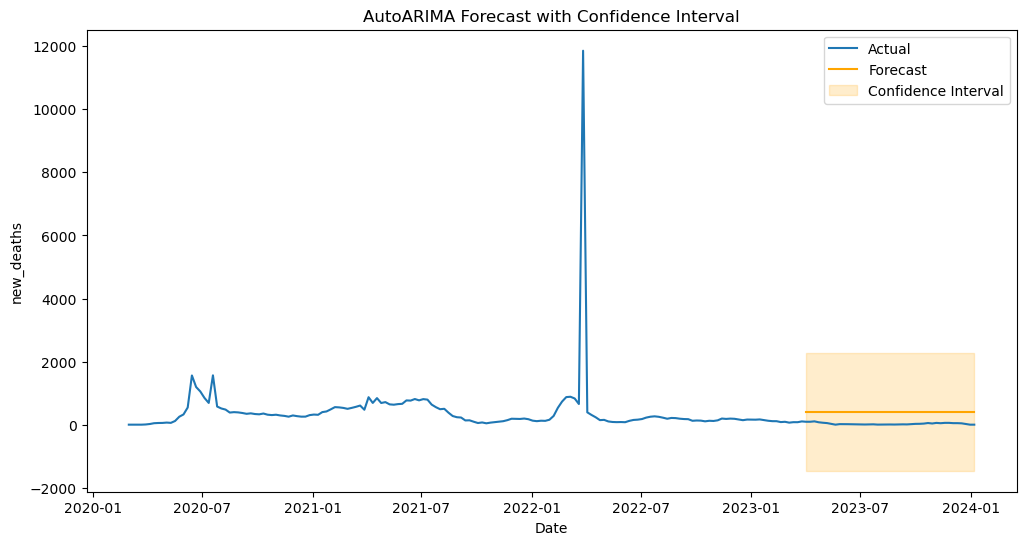

In [48]:
auto_chile = auto_arima(chile_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_chile.summary())

n_periods = len(chile_test)
forecast, conf_int = auto_chile.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = chile_test.index

plt.figure(figsize=(12, 6))
plt.plot(chile_data.index, chile_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [49]:
small_constant = 1
mape = np.mean(np.abs((chile_test['new_deaths'] - forecast) / (chile_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Chile', 'MAPE': mape}, ignore_index=True)

### Czechia AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -900.684
Date:                Wed, 28 Feb 2024   AIC                           1809.368
Time:                        20:43:17   BIC                           1821.669
Sample:                    03-01-2020   HQIC                          1814.363
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3489      0.092     14.625      0.000       1.168       1.530
ar.L2         -0.5973      0.058    -10.273      0.000      -0.711      -0.483
ma.L1         -0.5726      0.115     -4.969      0.0

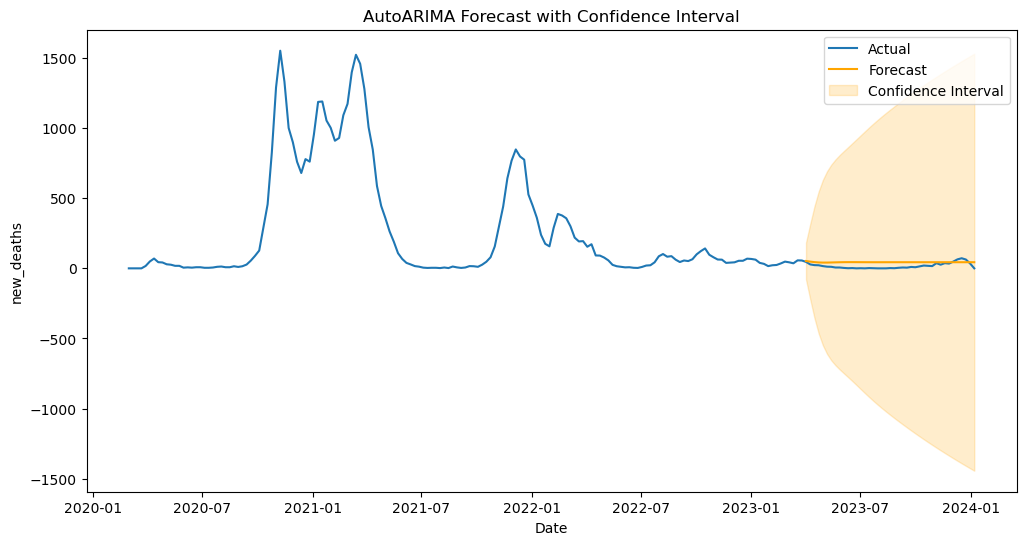

In [50]:
auto_czechia = auto_arima(czechia_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_czechia.summary())

n_periods = len(czechia_test)
forecast, conf_int = auto_czechia.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = czechia_test.index

plt.figure(figsize=(12, 6))
plt.plot(czechia_data.index, czechia_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [51]:
small_constant = 1
mape = np.mean(np.abs((czechia_test['new_deaths'] - forecast) / (czechia_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Czechia', 'MAPE': mape}, ignore_index=True)

### Estonia AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -636.094
Date:                Wed, 28 Feb 2024   AIC                           1284.188
Time:                        20:43:20   BIC                           1302.676
Sample:                    03-01-2020   HQIC                          1291.695
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1028      1.229      0.897      0.370      -1.306       3.512
ar.L1          1.4995      0.200      7.492      0.000       1.107       1.892
ar.L2         -0.5681      0.188     -3.028      0.0

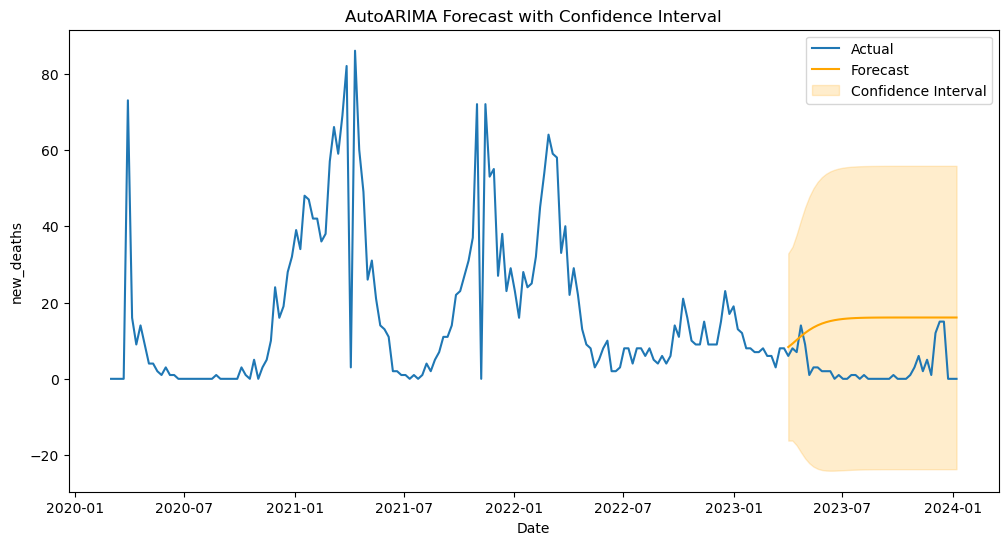

In [52]:
auto_estonia = auto_arima(estonia_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_estonia.summary())

n_periods = len(estonia_test)
forecast, conf_int = auto_estonia.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = estonia_test.index

plt.figure(figsize=(12, 6))
plt.plot(estonia_data.index, estonia_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [53]:
small_constant = 1
mape = np.mean(np.abs((estonia_test['new_deaths'] - forecast) / (estonia_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Estonia', 'MAPE': mape}, ignore_index=True)

### France AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -1075.032
Date:                Wed, 28 Feb 2024   AIC                           2158.064
Time:                        20:43:24   BIC                           2170.364
Sample:                    03-01-2020   HQIC                          2163.059
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9061      0.048     19.064      0.000       0.813       0.999
ar.L2         -0.2033      0.077     -2.657      0.008      -0.353      -0.053
ar.L3         -0.1775      0.052     -3.445      0.0

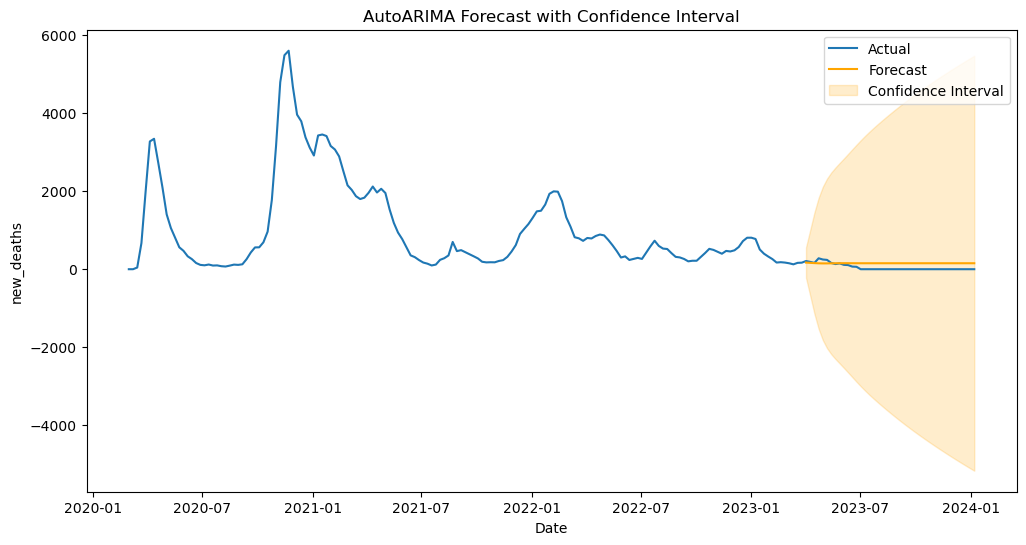

In [54]:
auto_france = auto_arima(france_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_france.summary())

n_periods = len(france_test)
forecast, conf_int = auto_france.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = france_test.index

plt.figure(figsize=(12, 6))
plt.plot(france_data.index, france_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [55]:
small_constant = 1
mape = np.mean(np.abs((france_test['new_deaths'] - forecast) / (france_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA France', 'MAPE': mape}, ignore_index=True)

### Ireland AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -733.853
Date:                Wed, 28 Feb 2024   AIC                           1475.706
Time:                        20:43:27   BIC                           1488.032
Sample:                    03-01-2020   HQIC                          1480.711
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.7278      3.709      2.083      0.037       0.457      14.998
ar.L1          1.5095      0.044     33.944      0.000       1.422       1.597
ar.L2         -0.6520      0.045    -14.545      0.0

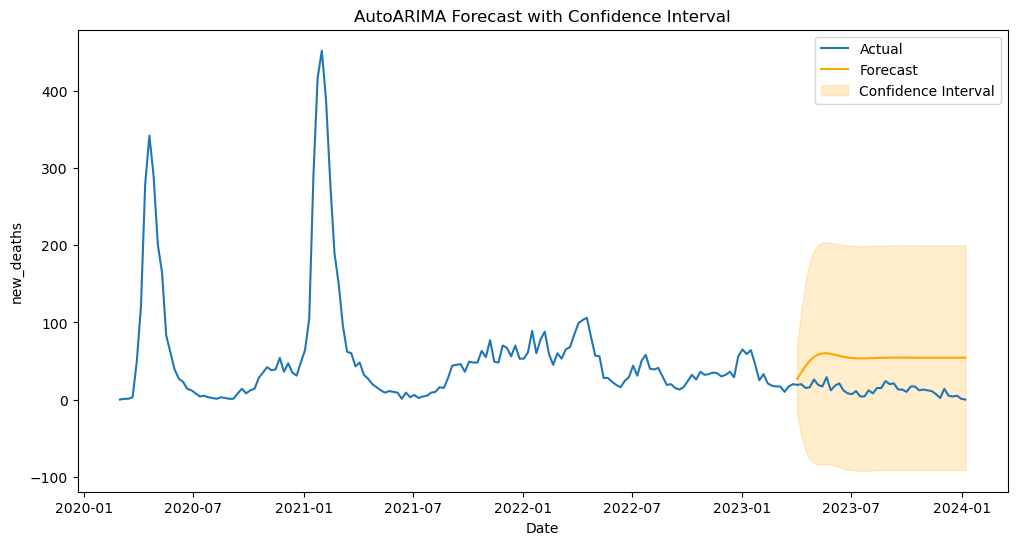

In [56]:
auto_ireland = auto_arima(ireland_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_ireland.summary())

n_periods = len(ireland_test)
forecast, conf_int = auto_ireland.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = ireland_test.index

plt.figure(figsize=(12, 6))
plt.plot(ireland_data.index, ireland_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [57]:
small_constant = 1
mape = np.mean(np.abs((ireland_test['new_deaths'] - forecast) / (ireland_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Ireland', 'MAPE': mape}, ignore_index=True)

### Israel AutoARIMA

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  161
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 4)   Log Likelihood                -728.598
Date:                           Wed, 28 Feb 2024   AIC                           1467.196
Time:                                   20:43:32   BIC                           1482.603
Sample:                               03-01-2020   HQIC                          1473.452
                                    - 03-26-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.4583      3.979      1.875      0.061      -0.340      15.256
ar.L1          1.6092      0.034     46.981

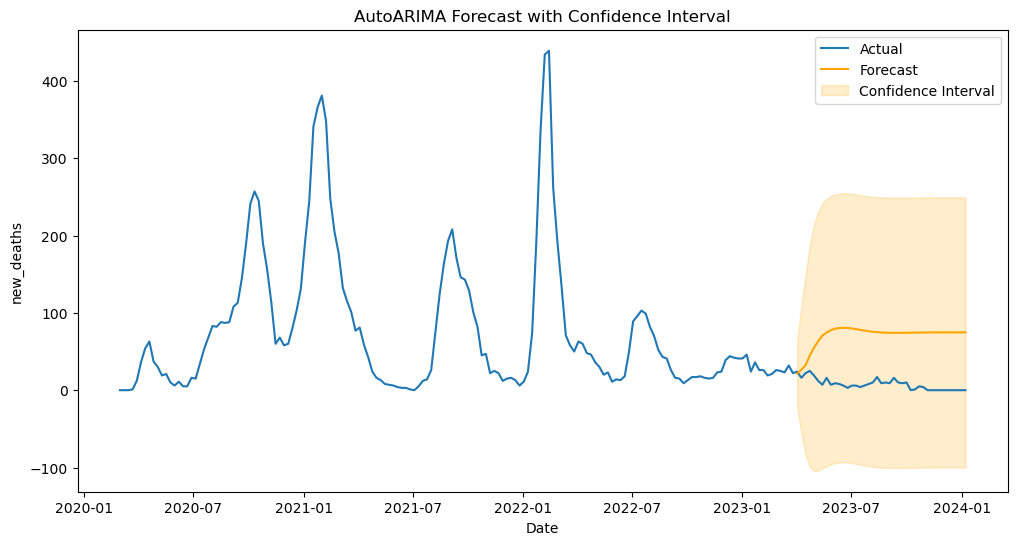

In [58]:
auto_israel = auto_arima(israel_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_israel.summary())

n_periods = len(israel_test)
forecast, conf_int = auto_israel.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = israel_test.index

plt.figure(figsize=(12, 6))
plt.plot(israel_data.index, israel_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [59]:
small_constant = 1
mape = np.mean(np.abs((israel_test['new_deaths'] - forecast) / (israel_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Israel', 'MAPE': mape}, ignore_index=True)

### Italy AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1124.256
Date:                Wed, 28 Feb 2024   AIC                           2258.511
Time:                        20:43:37   BIC                           2273.887
Sample:                    03-01-2020   HQIC                          2264.755
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6602      0.048     34.722      0.000       1.566       1.754
ar.L2         -0.7985      0.070    -11.438      0.000      -0.935      -0.662
ar.L3          0.0684      0.041      1.685      0.0

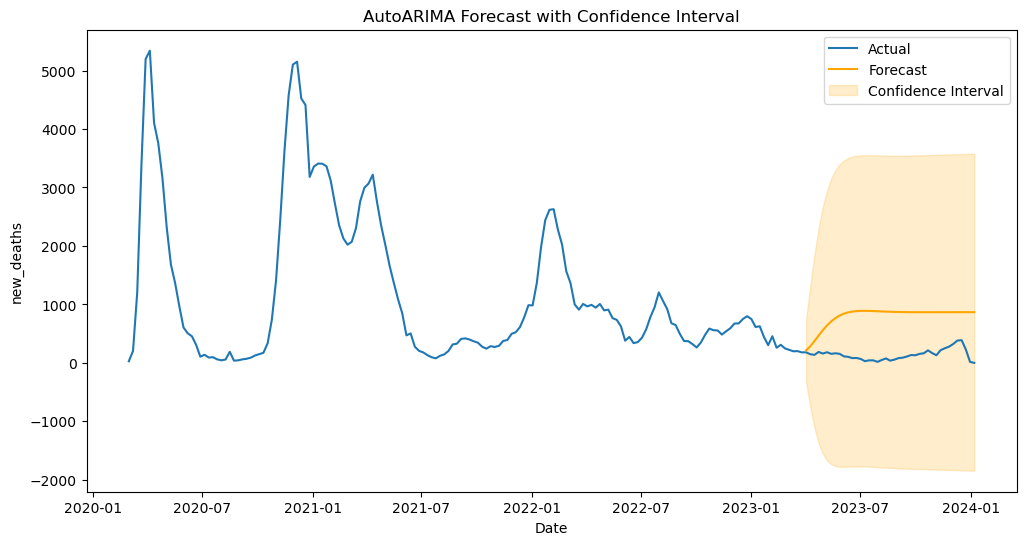

In [60]:
auto_italy = auto_arima(italy_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_italy.summary())

n_periods = len(italy_test)
forecast, conf_int = auto_italy.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = italy_test.index

plt.figure(figsize=(12, 6))
plt.plot(italy_data.index, italy_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [61]:
small_constant = 1
mape = np.mean(np.abs((italy_test['new_deaths'] - forecast) / (italy_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Italy', 'MAPE': mape}, ignore_index=True)

### Malaysia AutoARIMA

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  161
Model:             SARIMAX(3, 0, 3)x(0, 0, [1], 4)   Log Likelihood                -955.274
Date:                             Wed, 28 Feb 2024   AIC                           1926.548
Time:                                     20:43:49   BIC                           1951.200
Sample:                                 03-01-2020   HQIC                          1936.558
                                      - 03-26-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0894      0.158      6.880      0.000       0.779       1.400
ar.L2         -0.5774      

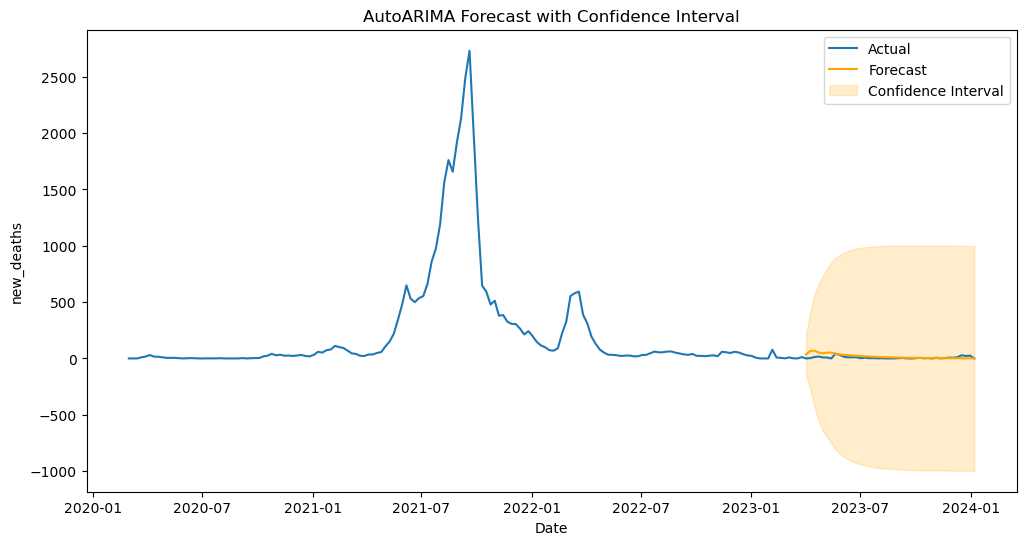

In [62]:
auto_malaysia = auto_arima(malaysia_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_malaysia.summary())

n_periods = len(malaysia_test)
forecast, conf_int = auto_malaysia.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = malaysia_test.index

plt.figure(figsize=(12, 6))
plt.plot(malaysia_data.index, malaysia_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [63]:
small_constant = 1
mape = np.mean(np.abs((malaysia_test['new_deaths'] - forecast) / (malaysia_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Malaysia', 'MAPE': mape}, ignore_index=True)

### USA AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1375.347
Date:                Wed, 28 Feb 2024   AIC                           2760.694
Time:                        20:43:55   BIC                           2776.070
Sample:                    03-01-2020   HQIC                          2766.938
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1882      0.051     23.410      0.000       1.089       1.288
ar.L2          0.1126      0.075      1.496      0.135      -0.035       0.260
ar.L3         -0.3708      0.050     -7.370      0.0

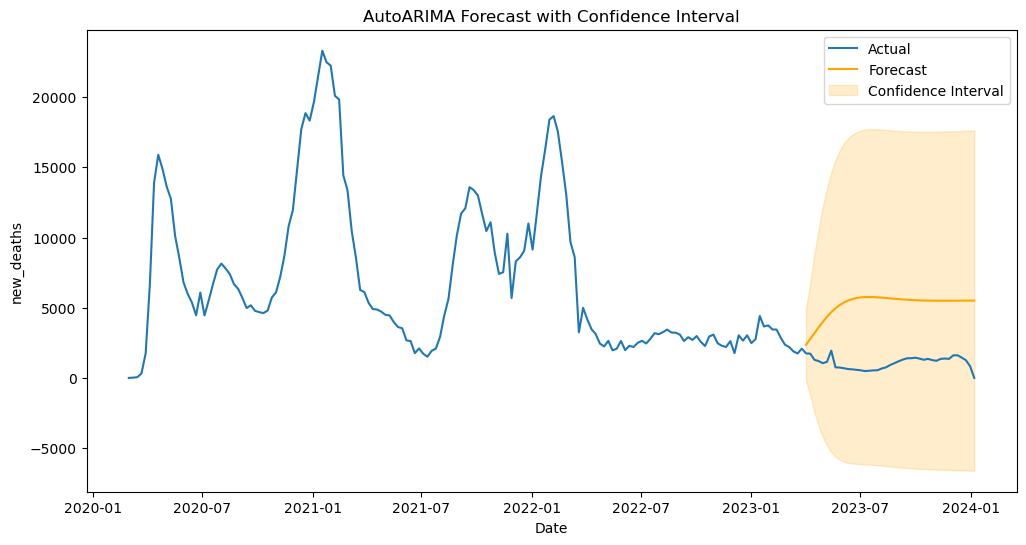

In [64]:
auto_usa = auto_arima(usa_train['new_deaths'], seasonal=True, m=4, suppress_warnings=True, stepwise=True)

print(auto_usa.summary())

n_periods = len(usa_test)
forecast, conf_int = auto_usa.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = usa_test.index

plt.figure(figsize=(12, 6))
plt.plot(usa_data.index, usa_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [65]:
small_constant = 1
mape = np.mean(np.abs((usa_test['new_deaths'] - forecast) / (usa_test['new_deaths'] + small_constant))) * 100
metrics_df = metrics_df.append({'Model': 'Auto ARIMA USA', 'MAPE': mape}, ignore_index=True)

## Prophet Univariate

In [66]:
! pip install prophet

In [67]:
from prophet import Prophet

### Belgium Prophet

20:44:00 - cmdstanpy - INFO - Chain [1] start processing
20:44:00 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 7.015323628051964


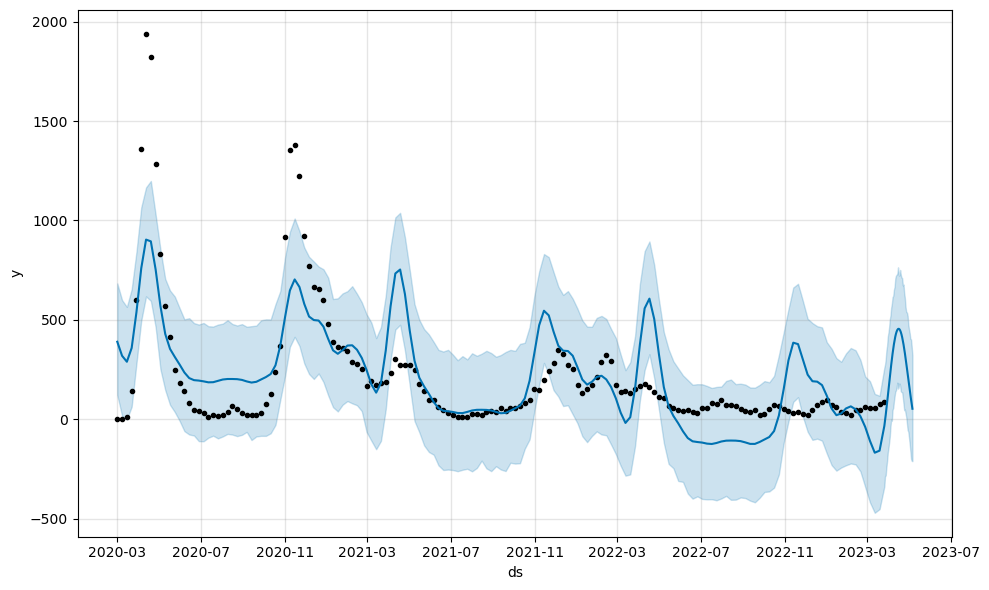

In [68]:
model_baseline = Prophet().fit(belgium_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(belgium_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}), forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet Belgium', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### Chile Prophet

20:44:00 - cmdstanpy - INFO - Chain [1] start processing
20:44:01 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 4.820258901160242


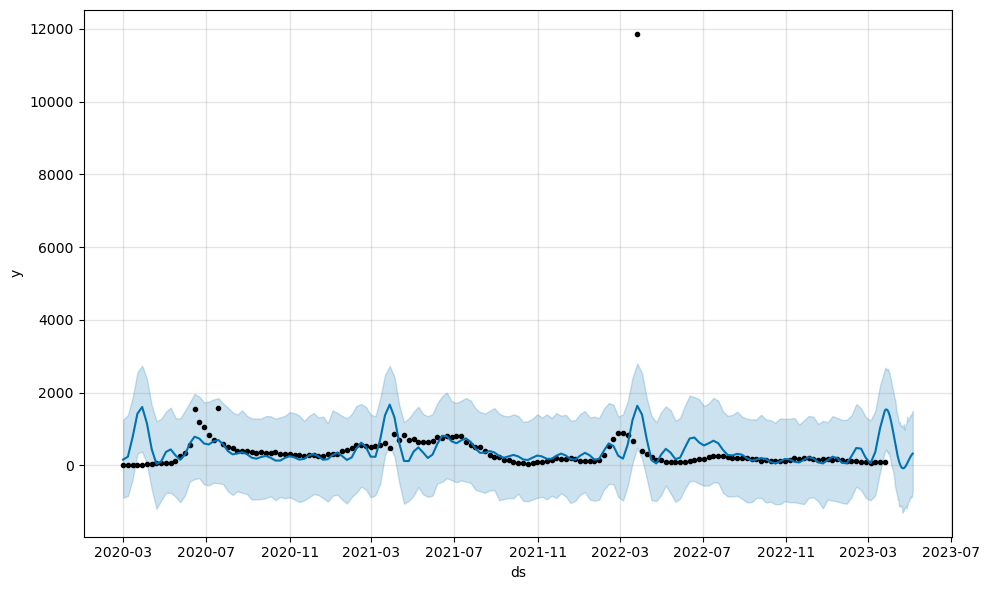

In [69]:
model_baseline = Prophet().fit(chile_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(chile_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet Chile', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### Czechia Prophet

20:44:01 - cmdstanpy - INFO - Chain [1] start processing


20:44:01 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 9.722774440171406


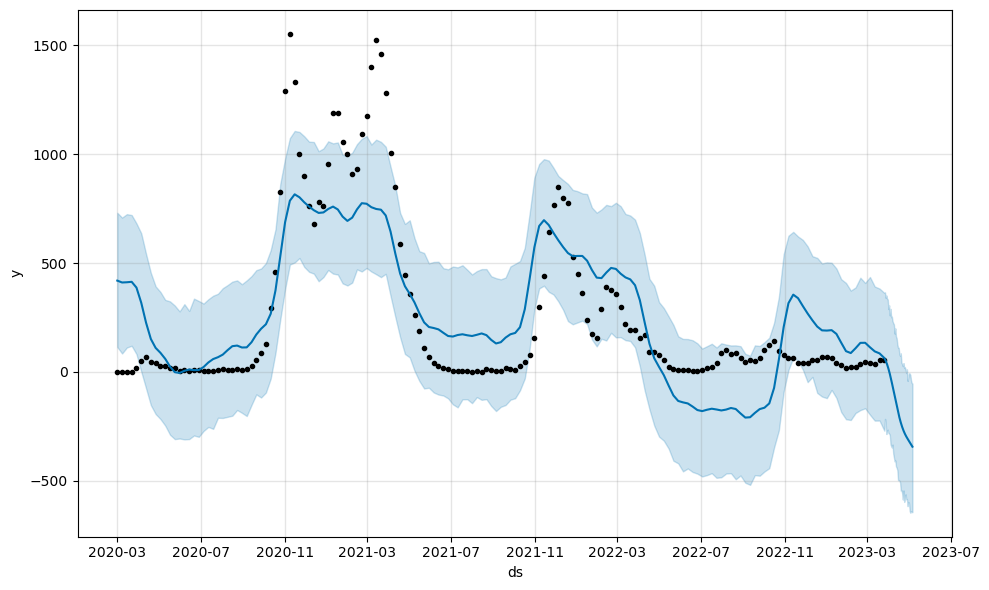

In [70]:
model_baseline = Prophet().fit(czechia_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(czechia_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet Czechia', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### Estonia Prophet

20:44:01 - cmdstanpy - INFO - Chain [1] start processing


20:44:01 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 1.4138695726894697


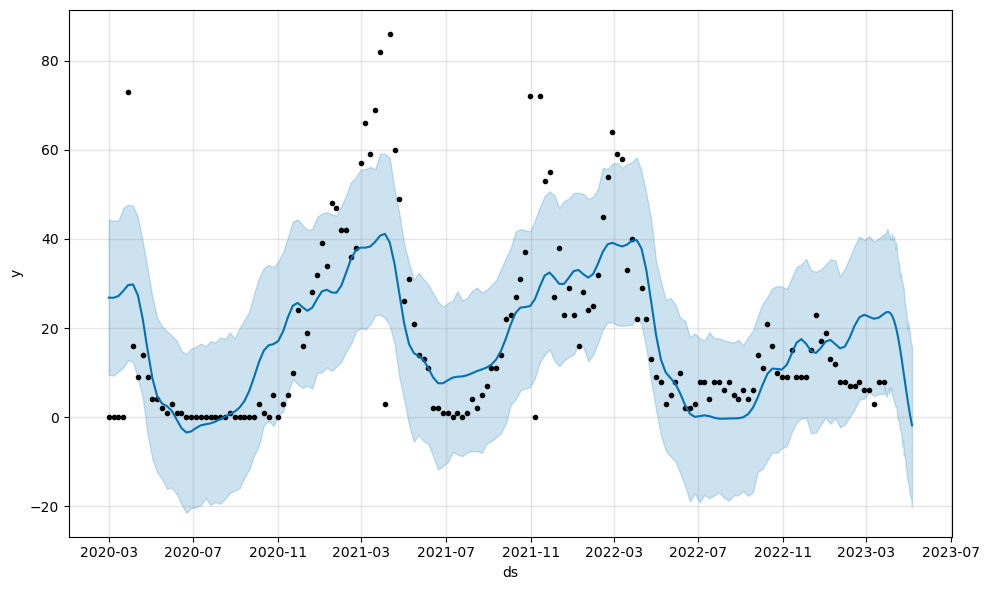

In [71]:
model_baseline = Prophet().fit(estonia_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(estonia_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet Estonia', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### France Prophet

20:44:01 - cmdstanpy - INFO - Chain [1] start processing


20:44:02 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 2.009784926263735


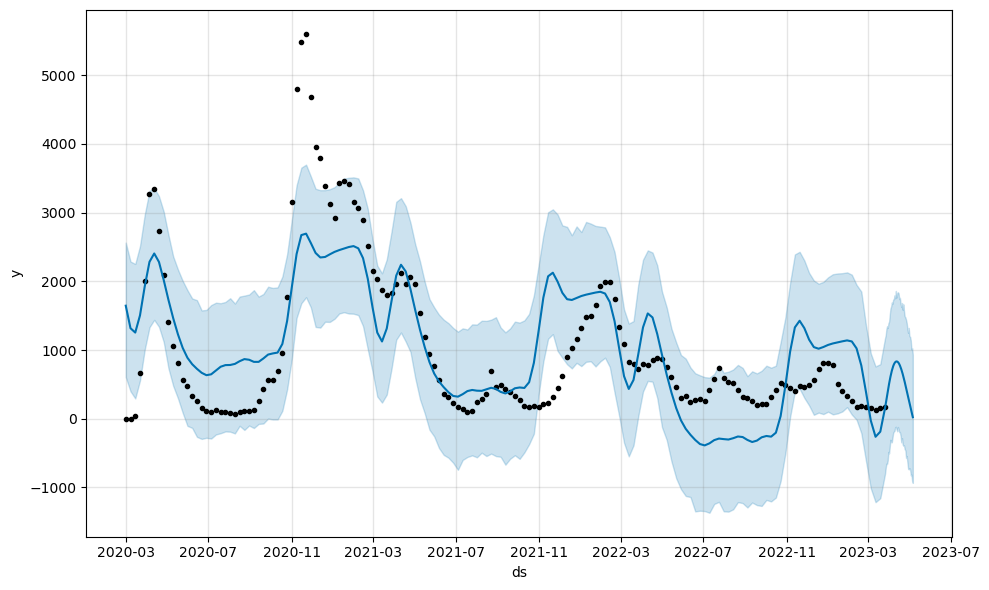

In [72]:
model_baseline = Prophet().fit(france_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(france_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet France', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### Ireland Prophet

20:44:02 - cmdstanpy - INFO - Chain [1] start processing


20:44:02 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 3.358164580695636


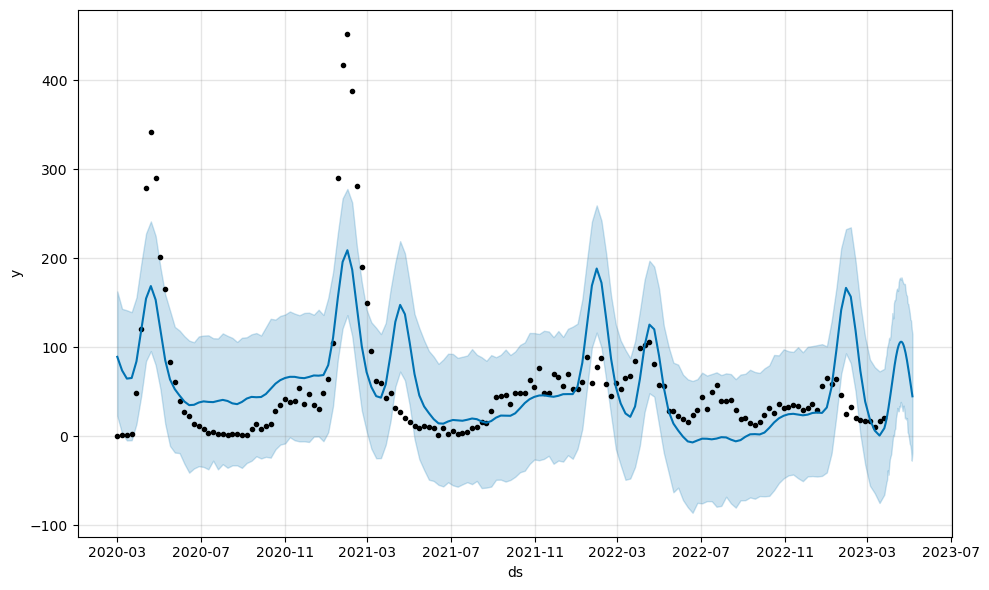

In [73]:
model_baseline = Prophet().fit(ireland_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(ireland_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet Ireland', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### Israel Prophet

20:44:02 - cmdstanpy - INFO - Chain [1] start processing


20:44:02 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 2.7430254425456644


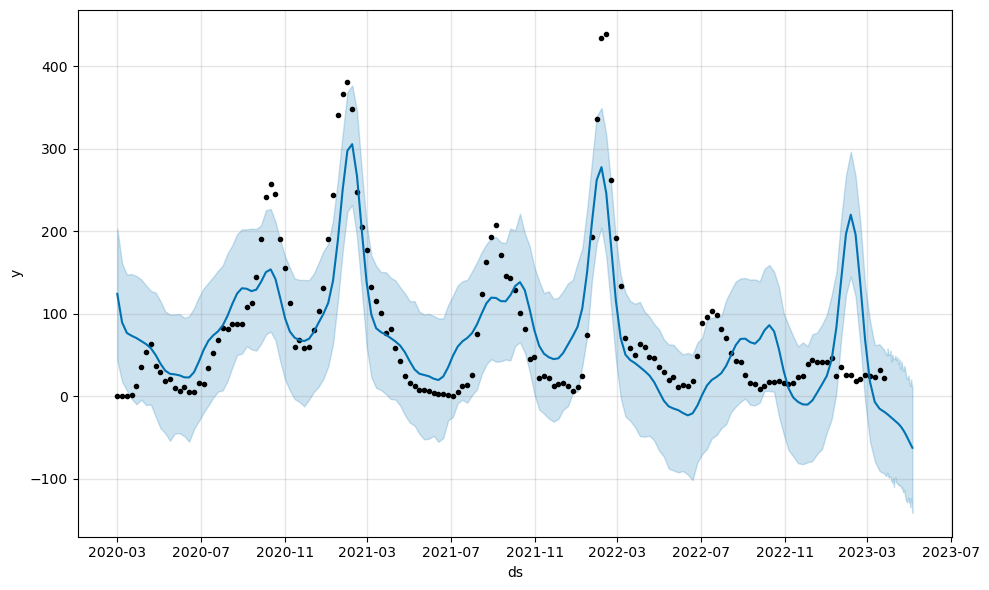

In [74]:
model_baseline = Prophet().fit(israel_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(israel_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet Israel', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### Italy Prophet

20:44:02 - cmdstanpy - INFO - Chain [1] start processing
20:44:03 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 7.842019183646995


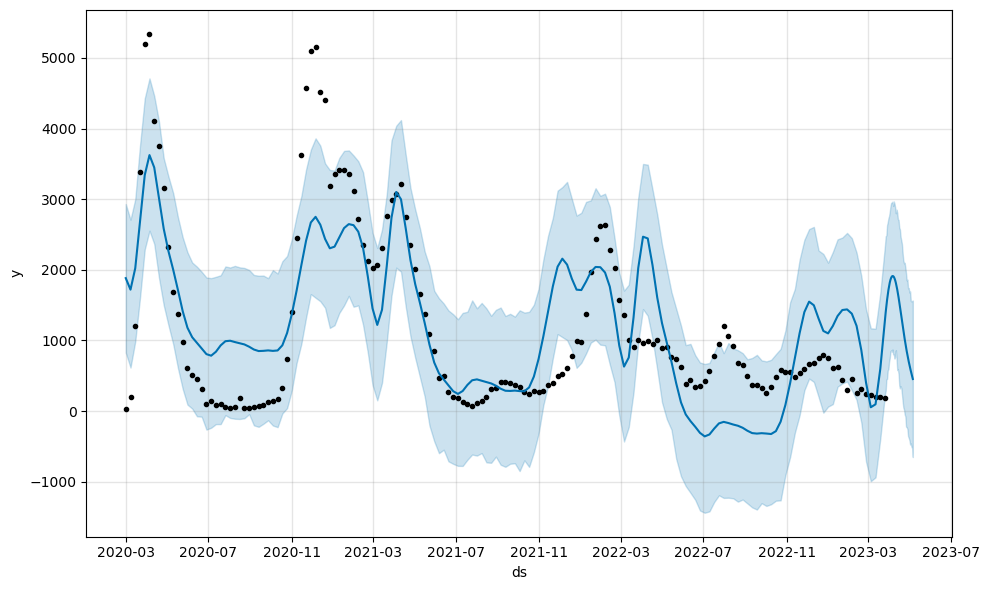

In [75]:
model_baseline = Prophet().fit(italy_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(italy_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet Italy', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### Malaysia Prophet

20:44:03 - cmdstanpy - INFO - Chain [1] start processing


20:44:03 - cmdstanpy - INFO - Chain [1] done processing


The adjusted MAPE for the baseline model is 6295.552693334362


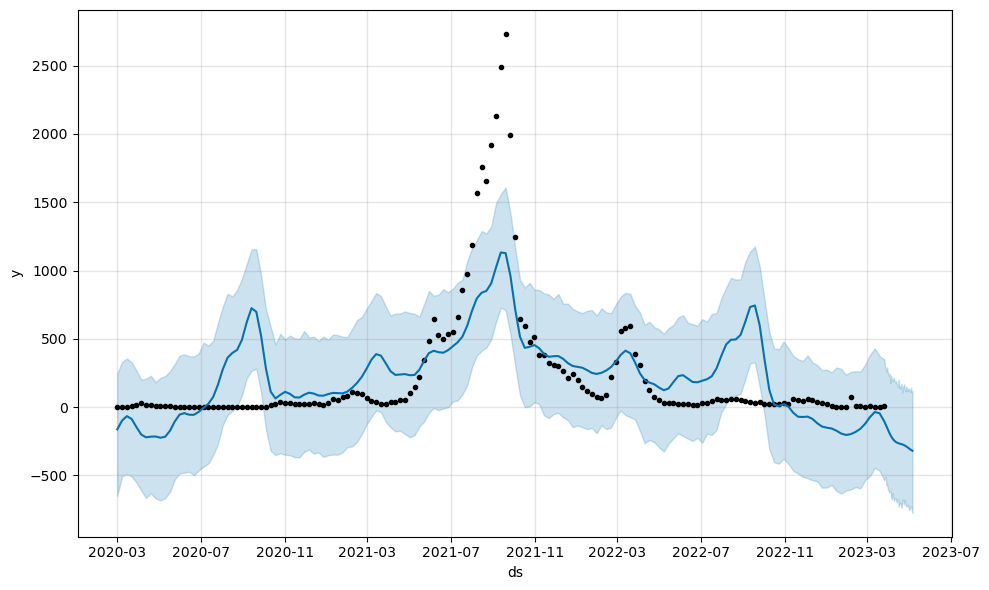

In [76]:
model_baseline = Prophet().fit(malaysia_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(malaysia_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')

def adjusted_mape(actuals, predictions, epsilon=1):
    actuals = np.array(actuals)
    predictions = np.array(predictions)
    ape = np.abs((actuals - predictions) / (actuals + epsilon))
    mape = np.mean(ape) * 100
    return mape

# Usage example with your performance_baseline DataFrame
performance_baseline_MAPE = adjusted_mape(
    performance_baseline['y'],
    performance_baseline['yhat']
)

print(f'The adjusted MAPE for the baseline model is {performance_baseline_MAPE}')

metrics_df = metrics_df.append({'Model': 'Prophet Malaysia', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

### USA Prophet

20:44:03 - cmdstanpy - INFO - Chain [1] start processing
20:44:03 - cmdstanpy - INFO - Chain [1] done processing


The MAPE for the baseline model is 1.778789911113487


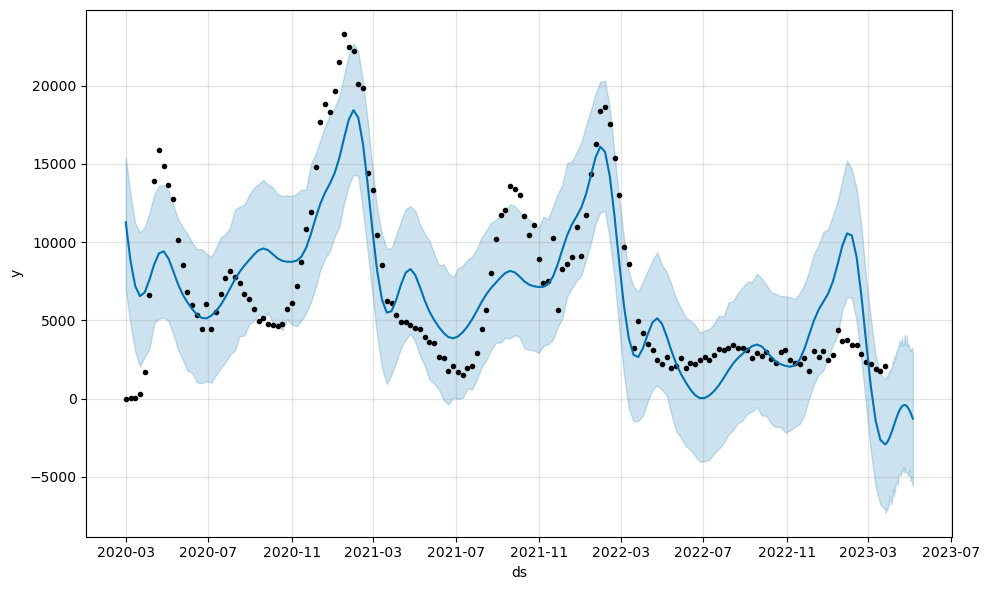

In [77]:
model_baseline = Prophet().fit(usa_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(usa_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')
metrics_df = metrics_df.append({'Model': 'Prophet USA', 'MAPE': performance_baseline_MAPE}, ignore_index=True)

## Prophet Multivariate

20:44:05 - cmdstanpy - INFO - Chain [1] start processing
20:44:08 - cmdstanpy - INFO - Chain [1] done processing


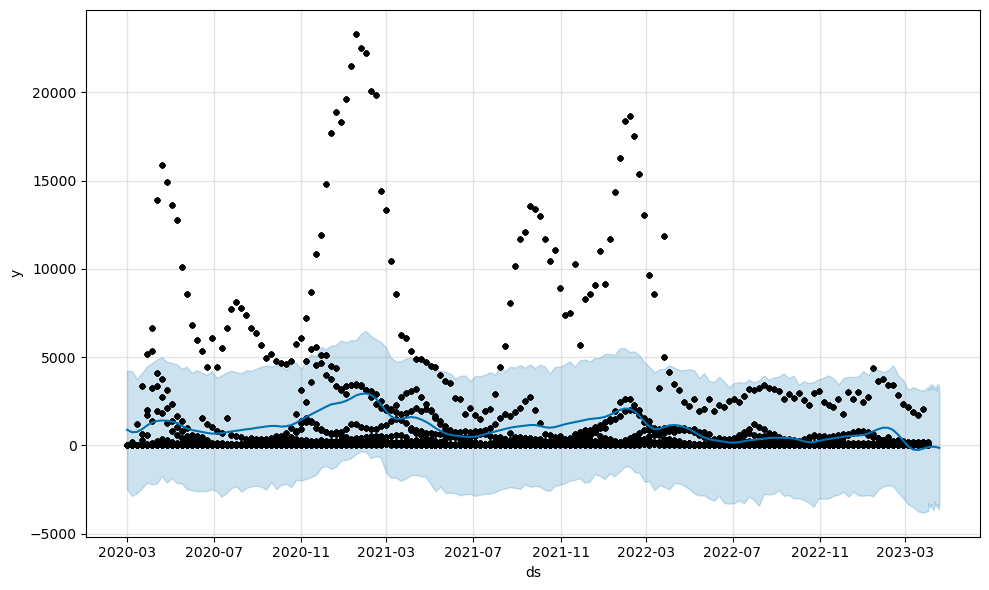

In [78]:
data = pd.read_csv('multi_variate_df.csv')
data['date'] = pd.to_datetime(data['date'])
data= data.set_index('date')

def process(df):
    lag1df = df.shift(1)
    lag1df.columns = ['lag1_' + str(col) for col in lag1df.columns]
    df=df[['new_deaths']].join(lag1df)
    return df.fillna(0) 
data=process(data)

data = pd.get_dummies(data)
train_size = int(len(data) * 0.8)
train=data.iloc[:train_size ] 
test=data.iloc[train_size: ] 

model = Prophet()
model=model.fit(train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future = model.make_future_dataframe(periods=16)

forecast = model.predict(future)

model.plot(forecast); 


In [83]:
small_constant = 1

forecast_test = forecast[['ds', 'yhat']].merge(test.reset_index()[['date', 'new_deaths']], left_on='ds', right_on='date', how='inner')
forecast_test['abs_error'] = np.abs(forecast_test['yhat'] - forecast_test['new_deaths'])
forecast_test['new_deaths'] += small_constant
forecast_test['percentage_error'] = forecast_test['abs_error'] / forecast_test['new_deaths'] * 100

mape = forecast_test['percentage_error'].mean()
print("Mean Absolute Percentage Error (MAPE):", mape)
metrics_df = metrics_df.append({'Model': 'Prophet Multivariate', 'MAPE': mape}, ignore_index=True)

Mean Absolute Percentage Error (MAPE): 877.2654896634235


## XGBoost 

In [87]:
df  = pd.read_csv('multi_variate_df.csv')
df  = df .set_index('date')
df.index = pd.to_datetime(df.index)
train_size = int(len(df) * 0.8)
train=df.iloc[:train_size ] 
test=df.iloc[train_size: ] 

In [89]:
X = df.drop(columns=['new_deaths'])  # Features
y = df['new_deaths']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = xgb.XGBRegressor(learning_rate=0.3,n_estimators=1000, early_stopping_rounds=10)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True) # Change verbose to True if you want to see it train

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:iso_code: object, continent: object, location: object, tests_units: object, season: object

In [88]:
X = df.drop(columns=['new_deaths'])  # Features
y = df['new_deaths']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:iso_code: object, continent: object, location: object, tests_units: object, season: object

## Metrics Results

In [84]:
sorted_metrics_df = metrics_df.sort_values(by='MAPE', ascending=True)
sorted_metrics_df['MAPE'] = sorted_metrics_df['MAPE'].astype(float)
sorted_metrics_df['MAPE'] = sorted_metrics_df['MAPE'].apply(lambda x: '{:.2f}'.format(x))
sorted_metrics_df


,Model,MAPE
23,Prophet Estonia,1.41
29,Prophet USA,1.78
24,Prophet France,2.01
26,Prophet Israel,2.74
25,Prophet Ireland,3.36
21,Prophet Chile,4.82
20,Prophet Belgium,7.02
27,Prophet Italy,7.84
22,Prophet Czechia,9.72
9,ARIMA USA,228.28
